# Notebook to achieve some test

In [3]:
import numpy as np

mA1 = np.random.rand(4, 1)  # Example 4x1 matrix
mA2 = np.random.rand(4, 1)  # Example 4x1 matrix

deltaA = mA1.T - mA2  # This will produce a (4,4) matrix

print(deltaA)

[[-0.17325224 -0.50282111  0.18050742 -0.10944559]
 [-0.14846214 -0.47803102  0.20529752 -0.08465549]
 [ 0.36072567  0.03115679  0.71448532  0.42453232]
 [-0.25228908 -0.58185796  0.10147057 -0.18848243]]


In [4]:
N = 1024
Q = 2
n = np.expand_dims(np.arange(N),axis=1)
i = np.arange(Q+1)
n**i

array([[      1,       0,       0],
       [      1,       1,       1],
       [      1,       2,       4],
       ...,
       [      1,    1021, 1042441],
       [      1,    1022, 1044484],
       [      1,    1023, 1046529]])

In [5]:
from utilities.munkres import Munkres
import numpy as np
import time 
matrix_cost = np.random.random((200,100))

print(np.shape(matrix_cost))

m = Munkres()

t1 = time.time()
solution = m.compute(matrix_cost)
tstop = time.time()-t1

print(np.shape(solution))
print("time taken to compute solution:", tstop)

(200, 100)
(100, 2)
time taken to compute solution: 2.167287826538086


In [6]:
from scipy.optimize import linear_sum_assignment
t1 = time.time()
solution2 = np.transpose(linear_sum_assignment(matrix_cost))
tstop = time.time()-t1

print(np.shape(np.transpose(solution2)))
print("time taken to compute solution:", tstop)

(2, 100)
time taken to compute solution: 0.00030612945556640625


In [7]:
print(solution == solution2)


[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  T

In [8]:
## Generation of a numpy sinwave with fluctuation 

import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 44100  # Sampling rate (Hz)
duration = 2  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)
f_variation = 50  # Frequency variation depth (Hz)
modulation_rate = 10  # Frequency modulation rate (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

freq_ramp = np.linspace(100,2000,len(t))

# Frequency modulation
f_t = freq_ramp + f_variation * np.sin(2 * np.pi * modulation_rate * t)

f_t2 = max(freq_ramp) - f_t

# Generate the sine wave with time-varying frequency
wave1 = 1/2*np.sin(2 * np.pi * np.cumsum(f_t) / fs)
wave2 = 1/2*np.sin(2 * np.pi * np.cumsum(f_t2) / fs)
wave = wave1 + wave2

# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)

# Save as WAV file
wav.write("sine_wave_variating.wav", fs, wave_int16)

print("WAV file generated: sine_wave_variating.wav")


WAV file generated: sine_wave_variating.wav


In [1]:
## Generation of a numpy sinwave with fluctuation 

import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 44100  # Sampling rate (Hz)
duration = 2  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)
f_variation = 50  # Frequency variation depth (Hz)
modulation_rate = 10  # Frequency modulation rate (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Frequency ramp
freq_ramp = np.linspace(100,2000,len(t))

# Frequency modulation
f_t = freq_ramp 

f_t2 = max(freq_ramp) - freq_ramp

# Generate the sine wave with time-varying frequency
wave1 = 1/2*np.sin(2 * np.pi * np.cumsum(f_t) / fs)
wave2 = 1/2*np.sin(2 * np.pi * np.cumsum(f_t2) / fs)
wave = wave1 + wave2

# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)

# Save as WAV file
wav.write("sine_wave_crossing.wav", fs, wave_int16)

print("WAV file generated: sine_wave_crossing.wav")


WAV file generated: sine_wave_crossing.wav


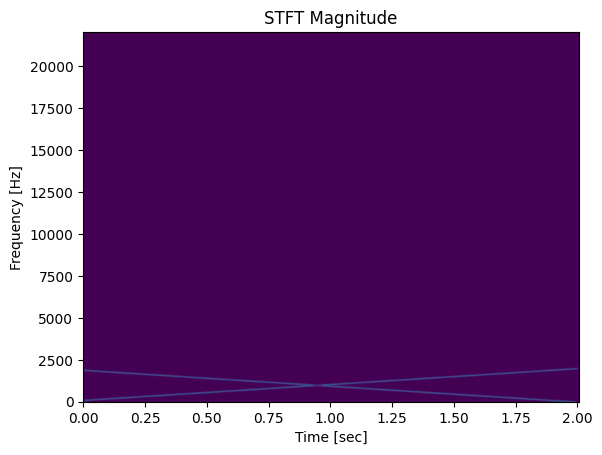

In [2]:
from scipy import signal
import matplotlib.pyplot as plt

amp = max(wave)
f, t, Zxx = signal.stft(wave, fs, nperseg=1000)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

(48000,)
WAV file generated: sine_wave_1_440.wav


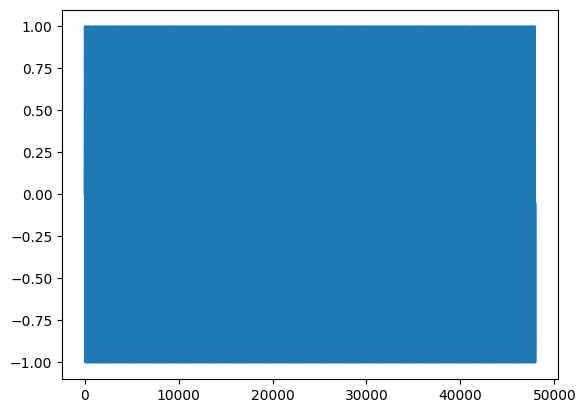

In [25]:
import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 48000  # Sampling rate (Hz)
duration = 1  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate the sine wave with constant frequency
wave = np.sin(2 * np.pi * f_base * t)
plt.plot(wave)
# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)
print(np.shape(wave_int16))
# Save as WAV file
wav.write("sine_wave_1_440.wav", fs, wave_int16)

print("WAV file generated: sine_wave_1_440.wav")



In [11]:
Spectro = np.load("/Users/colas/Documents/Programmation/Python/Fast_Partial_Tracking_Python/Spectro_Sin8.npy")
Time = np.load("/Users/colas/Documents/Programmation/Python/Fast_Partial_Tracking_Python/Tracker_time.npy")
print(np.shape(Spectro))
print(np.shape(Time))

(578, 4096)
(578,)


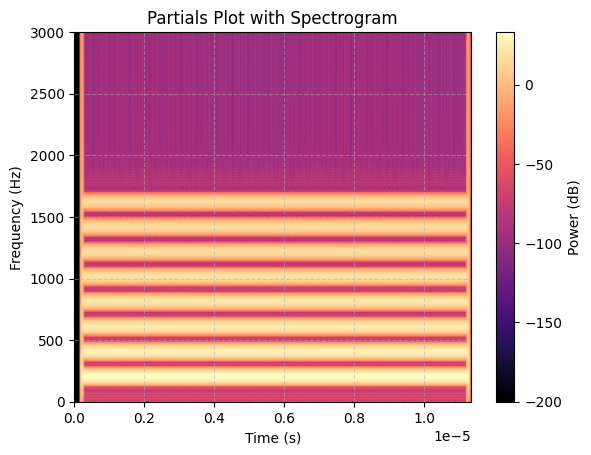

In [12]:
import matplotlib.pyplot as plt

Ndft = 4096

freqs = np.fft.rfftfreq(Ndft, d=1/fs)  # Compute correct frequency bins
time = freqs/fs
extent = [time[0] / fs, time[-1] / fs, freqs[0], freqs[-1]]  # Update extent
plt.imshow(20 * np.log10(np.abs(np.transpose(Spectro[:,:Ndft//2])+1e-10)), aspect='auto', extent = extent , origin='lower', cmap='magma')
    
plt.axis('tight')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Partials Plot with Spectrogram')
plt.colorbar(label="Power (dB)")
plt.ylim((0, 3000))
plt.show()

In [13]:
from utilities.munkres import Munkres

cost_matrix = np.load("/Users/colas/Documents/Programmation/Python/Fast_Partial_Tracking_Python/cost_matrix_sin8.npy")
print(cost_matrix[:,:,0].astype(float))

[[2.23855600e-03 5.14564243e-02 1.11988443e-02 ... 2.00612393e-01
  2.00305356e-01 2.00229105e-01]
 [7.91136653e-02 1.34692666e-04 4.22010585e-02 ... 2.00783364e-01
  2.00488118e-01 2.00226483e-01]
 [6.26430403e-02 3.71763740e-03 2.33099652e-02 ... 2.01025568e-01
  2.00616380e-01 2.00317488e-01]
 ...
 [2.00345069e-01 2.00283687e-01 2.00513423e-01 ... 4.87445488e-01
  3.57620095e-01 6.91579226e-02]
 [2.00531988e-01 2.00615904e-01 2.00878579e-01 ... 3.56561699e-02
  3.41290164e-01 1.48455505e-01]
 [2.00183106e-01 2.00143282e-01 2.00272335e-01 ... 5.37093417e-01
  3.19204330e-01 1.14959408e-01]]


In [14]:
m = Munkres()
output = np.array(m.compute(cost_matrix[:,:,0].astype(float)))

In [15]:
column = output[:,0]
row = output[:,1]

print(column)

[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 30 31 32]


In [20]:
## generation of a 1 sine wave signal : 


## Generation of a numpy sinwave with fluctuation 

import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 44100  # Sampling rate (Hz)
duration = 1  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate the sine wave with constant frequency
wave = np.sin(2 * np.pi * f_base / fs * t)

# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)
print(np.shape(wave_int16))
# Save as WAV file
wav.write("sine_wave_1_440.wav", fs, wave_int16)

print("WAV file generated: sine_wave_1_440.wav")


(44100,)
WAV file generated: sine_wave_1_440.wav
